In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the Universal bank data

bankdata = pd.read_csv(r"Universalbank.csv", header=0) 
bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Displaying the dataset information

bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (> 10 : 1, then the dataset is imbalance data)

CreditCard_count = bankdata.CreditCard.value_counts()
print('Class 0:', CreditCard_count[0])
print('Class 1:', CreditCard_count[1])
print('Proportion:', round(CreditCard_count[0] / CreditCard_count[1], 2), ': 1')
print('Total Bank records:', len(bankdata))

Class 0: 3530
Class 1: 1470
Proportion: 2.4 : 1
Total Bank records: 5000


In [5]:
# Delete the columns which are not influencing the target variable

del bankdata['ID']
del bankdata['ZIP Code']

In [6]:
# Displaying the dataset columns

bankdata.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [7]:
# cols1 is variables - crating a dummy variables

cols1 = ['Family', 'Education']
print(cols1)

['Family', 'Education']


In [8]:
# cols2 variables - MinMaxScalar function

cols2 = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
print(cols2)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


In [9]:
# cols2 variables - MinMaxScalar function

#cols2 = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family', 'Education']
#print(cols2)

In [10]:
# Create dummy variable for all range values

bankdata = pd.get_dummies(bankdata, columns=cols1)
bankdata.head().T

,0,1,2,3,4
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0
Securities Account,1.0,1.0,0.0,0.0,0.0
CD Account,0.0,0.0,0.0,0.0,0.0
Online,0.0,0.0,0.0,0.0,0.0
CreditCard,0.0,0.0,0.0,0.0,1.0


In [11]:
# Identify the Independent and Target variables

IndepVar = []
for col in bankdata.columns:
    if col != 'CreditCard':
        IndepVar.append(col)

TargetVar = 'CreditCard'

x = bankdata[IndepVar]
y = bankdata[TargetVar]

In [12]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_test_F1 = x_test.copy()

In [13]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols2] = mmscaler.fit_transform(x_train[cols2])
x_train = pd.DataFrame(x_train)

x_test[cols2] = mmscaler.fit_transform(x_test[cols2])
x_test = pd.DataFrame(x_test)

# Voting Classifier

In [14]:
# Voting classifier is a model

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Model object for other models used in the solution

modelLR = LogisticRegression(solver="lbfgs", random_state=42)
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)
modelSVC = SVC(gamma="scale", random_state=42, probability=True)

# Model for Voting classifier

modelVOT = VotingClassifier(estimators=[('lr', modelLR), ('rf', modelRF), ('svc', modelSVC)], 
                            voting='soft', weights=[1, 1, 1])

# Fit the model with train data

modelVOT.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft', weights=[1, 1, 1])

Confusion matrix : 
 [[  68  359]
 [  14 1059]]
Outcome values : 
 68 359 14 1059
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.16      0.27       427
           0       0.75      0.99      0.85      1073

    accuracy                           0.75      1500
   macro avg       0.79      0.57      0.56      1500
weighted avg       0.77      0.75      0.68      1500

Accuracy : 75.1 %
Precision : 82.9 %
Recall : 15.9 %
F1 Score : 0.267
Balanced Accuracy : 57.3 %
MCC : 0.29
roc_auc_score: 0.623


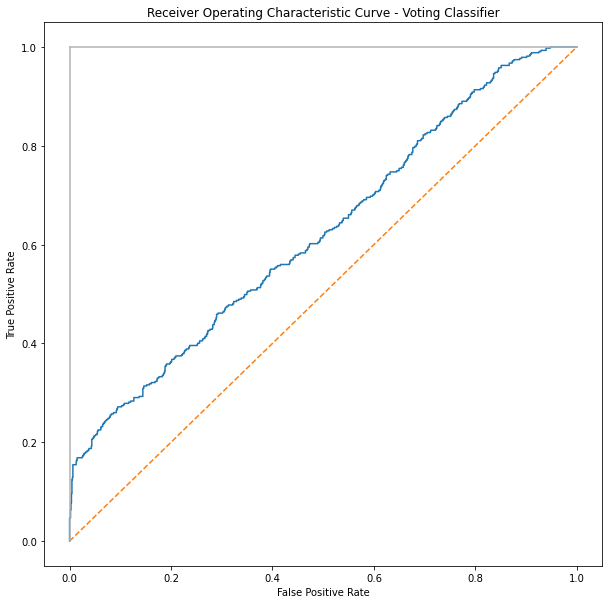

In [15]:
# Predict the model with test data

y_pred = modelVOT.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n',matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3)
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = modelVOT.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score:', round(roc_auc_score(y_test, y_score1), 3))
    
# Plot the Receiver Operating Characteristic(RoC) curve

pyplot.subplots(1, figsize=(10,10))
pyplot.title('Receiver Operating Characteristic Curve - Voting Classifier')
pyplot.plot(false_positive_rate1, true_positive_rate1)
pyplot.plot([0, 1], ls="--")
pyplot.plot([0, 0], [1, 0] , c=".7"), pyplot.plot([1, 1] , c=".7")
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

# The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier

In [16]:
# Load the result dataset

EMResults = pd.read_csv(r"D:\00 Henotic\SRKR\Datasets\HTResults.csv", header=0)
EMResults.head()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\00 Henotic\\SRKR\\Datasets\\HTResults.csv'

In [ ]:
# 

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Model object for other models used in the solution

modelLR = LogisticRegression(solver="lbfgs", random_state=42)
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)
modelSVC = SVC(gamma="scale", random_state=42, probability=True)

# Evalution matrix for all the algorithms

MM = [modelLR, modelRF, modelSVC, modelVOT]
#for models in (modelLR, modelRF, modelSVC, modelVOT):
for Models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', Models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    matrix = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n',matrix)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    y_score1 = models.predict_proba(x_test)[:,1]
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
    print('roc_auc_score:', round(roc_auc_score(y_test, y_score1), 3))
    
    # Plot the Receiver Operating Characteristic(RoC) curve

    pyplot.subplots(1, figsize=(10,10))
    pyplot.title('Receiver Operating Characteristic Curve')
    pyplot.plot(false_positive_rate1, true_positive_rate1)
    pyplot.plot([0, 1], ls="--")
    pyplot.plot([0, 0], [1, 0] , c=".7"), pyplot.plot([1, 1] , c=".7")
    pyplot.ylabel('True Positive Rate')
    pyplot.xlabel('False Positive Rate')
    pyplot.show()

    # The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier
    
    print('----------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------
    new_row = {'Model Name' : Models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------

In [17]:
# VotingClassifier(estimators = *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)

# from sklearn.ensemble import VotingClassifier

# modelVOT=VotingClassifier(estimators=[(string,estimator)], voting)

In [18]:
# Load the result dataset

#EMResults.to_csv("D://00 Henotic//SRKR//Datasets//Results//EMResults_22.csv")

EMResults.head(10)

NameError: name 'EMResults' is not defined